In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from matplotlib import cm

In [2]:
import algo

In [31]:
ww = float(input("entrez valeur de omega [0..100] "))
eps = float(input("entrez valeur de epsilon [0..15] "))

ZoomX = float(input("entrez valeur de l'intervale x [0..10]"))
ZoomY = float(input("entrez valeur de l'intervale |y| [0..10]"))

y0 = float(input("entrez origine source 1 ["+ str(-ZoomY)+".."+str(ZoomY)+"] "))
y1 = float(input("entrez origine source 2 ["+ str(-ZoomY)+".."+str(ZoomY)+"] "))


T1 = float(input("entrez la valeur de l'ouverture de la fente 1 [0..1]"))
T2 = float(input("entrez la valeur de l'ouverture de la fente 2 [0..1]"))

a = float(input("entrez valeur de a [-40..-1] "))
b = float(input("entrez valeur de b [1..40] "))
p = int(input("diviser en p intervale [10..100] "))

eps = complex(0,eps)

entrez valeur de omega [0..100] 10
entrez valeur de epsilon [0..15] 0.1
entrez valeur de l'intervale x [0..10]6
entrez valeur de l'intervale |y| [0..10]4
entrez origine source 1 [-4.0..4.0] -1
entrez origine source 2 [-4.0..4.0] 1
entrez la valeur de l'ouverture de la fente 1 [0..1]0.1
entrez la valeur de l'ouverture de la fente 2 [0..1]0.1
entrez valeur de a [-40..-1] -30
entrez valeur de b [1..40] 30
diviser en p intervale [10..100] 75


In [32]:
dx = 0.01
dy = 0.01
listX = np.arange(dx,ZoomX+dx*0.5,dx)
listY = np.arange(-ZoomY,ZoomY+dy*0.5,dy)

In [33]:
const = ww**2+eps
div_pi = 1./np.pi


resGauss = np.zeros((len(listX),len(listY)),dtype=complex) 

for ix,x in enumerate(listX):
    resy = [] 
    myf1 = lambda xi :np.sinc(xi*T1)*np.exp(1.0j*(listX[ix]*np.sqrt(const-xi**2) + xi*(listY-y0)))
    
    myf2 = lambda xi :np.sinc(xi*T2)*np.exp(1.0j*(listX[ix]*np.sqrt(const-xi**2) + xi*(listY-y1)))
        
    resQuadGauss1 = algo.quadGauss(a,b,p,myf1)
    resQuadGauss2 = algo.quadGauss(a,b,p,myf2)
    
    resGauss[ix,:] = T1 * resQuadGauss1 + T2 * resQuadGauss2
    

resGauss = div_pi * np.array(resGauss).T

Text(0.5, 0.98, 'omega = 10.0 epsilon = 0.1 a = -30.0 b = 30.0 T1 0.1 T2 0.1')

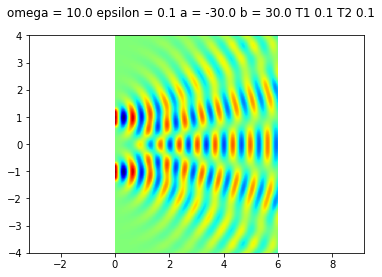

In [34]:
ptX,ptY = np.meshgrid(listX,listY)

fig, axs = plt.subplots(nrows=1,ncols=1)


axs.pcolor(ptX,ptY,np.real(resGauss),cmap = cm.jet)
axs.axis('equal')

fig.suptitle("omega = "+str(ww)+" epsilon = "+str(np.abs(eps))+" a = "+str(a)+" b = "+str(b)+" T1 "+str(T1)+" T2 "+str(T2))

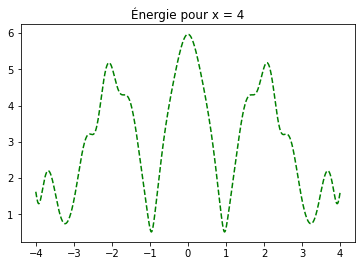

In [36]:
plt.plot(listY,np.abs(resQuadGauss1 + resQuadGauss2),"g--")
plt.title("Énergie pour x = 4")
plt.savefig("tranche_énergie_2F.png")

In [37]:
sauve = str(input("sauver le graphe ? [oui/non]"))

if sauve == "oui" :
    import os
    my_path = os.path.abspath("../../rapport/images/2F/")
    titre = "omega = "+str(ww)+" epsilon = "+str(np.abs(eps))+" zoomX = "+str(ZoomX)+" zoomY = "+str(ZoomY)+".png"
    fig.savefig(os.path.join(my_path, titre))

sauver le graphe ? [oui/non]oui
